In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv, re
import nltk
import string
from html.parser import HTMLParser

from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD

In [31]:
# nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/leesurkis/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [42]:
df = pd.read_csv('tweets_4emotions.csv')

In [43]:
df = df.iloc[:,0:3]
df
# add feature that looks at profanity using fuzzywuzzy

,ID,content,emotion
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger
1,10001,So my Indian Uber driver just called someone t...,anger
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger
3,10003,so ef whichever butt wipe pulled the fire alar...,anger
4,10004,Don't join @BTCare they put the phone down on ...,anger
5,10005,My blood is boiling,anger
6,10006,When you've still got a whole season of Wentwo...,anger
7,10007,@bt_uk why does tracking show my equipment del...,anger
8,10008,@TeamShanny legit why i am so furious with him...,anger
9,10009,How is it suppose to work if you do that? Wtf ...,anger


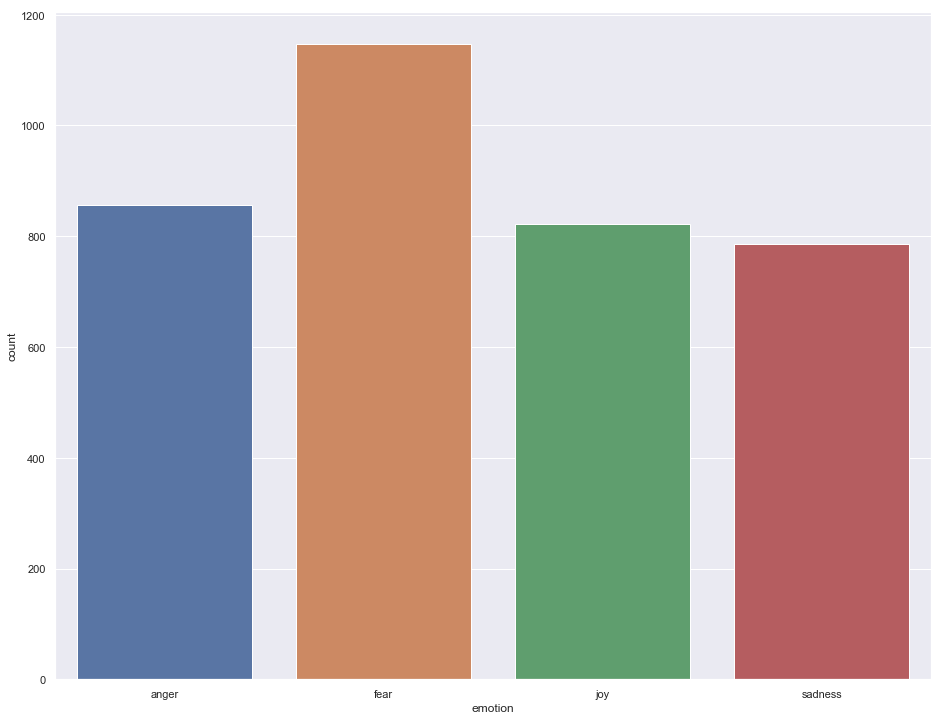

In [45]:
ax = sns.countplot(x="emotion", data=df)
sns.set(rc={'figure.figsize':(15.7,12.27)})

In [46]:
# replacing all punctuation apart from @ mentions with '' and making lower case
df['regex'] = df['content'].apply(lambda x: re.sub("[^@ a-z0-9]","",x.lower()))

In [47]:
# removing twitter handles
df['remove_mentions'] = df['regex'].apply(lambda x: ' '.join(re.sub("(@[A-Za-z0-9]+)","",x).split()))

In [48]:
# replacing some slang
df['no_slang'] = df['remove_mentions'].apply(lambda x: re.sub('(ahhh|ahhhh|ahhhh|ahhhhh|ahhhhhh|ahhhhhh)',
                            'ahh',x)).apply(lambda x: re.sub('(hahaha|hahahaha|hahahahaha)','haha'
                                ,x)).apply(lambda x: re.sub('(awww|awwww|awwwww|awwwwww|awwwwwww|awwwwwwww)','aww',x))

In [41]:
df.head()

,ID,content,emotion,regex,remove_mentions,shorthand,no_slang
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,how the fuk who the heck moved my fridge shoul...,how the fuk who the heck moved my fridge shoul...,how the fuck who the heck moved my fridge shou...,how the fuk who the heck moved my fridge shoul...
1,10001,So my Indian Uber driver just called someone t...,anger,so my indian uber driver just called someone t...,so my indian uber driver just called someone t...,so my indian uber driver just called someone t...,so my indian uber driver just called someone t...
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,@dpduk i asked for my parcel to be delivered t...,i asked for my parcel to be delivered to a pic...,i asked for my parcel to be delivered to a pic...,i asked for my parcel to be delivered to a pic...
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,so ef whichever butt wipe pulled the fire alar...,so ef whichever butt wipe pulled the fire alar...,so ef whichever butt wipe pulled the fire alar...,so ef whichever butt wipe pulled the fire alar...
4,10004,Don't join @BTCare they put the phone down on ...,anger,dont join @btcare they put the phone down on y...,dont join they put the phone down on you talk ...,dont join they put the phone down on you talk ...,dont join they put the phone down on you talk ...


In [57]:
# my own replacement of slang words

df['shorthand'] = df['no_slang'].str.replace(' bc ', ' because ').str.replace(' u ', 
                                ' you ').str.replace(' bf ', ' boyfriend ').str.replace(' gf ', ' girlfriend ').str.replace(' nyt ', 
                                ' night ').str.replace(' ima ', ' i am going to ').str.replace(' wut ', ' what ').str.replace(' wud ', 
                                ' would ').str.replace(' n ', ' and ').str.replace(' fuk ', ' fuck ').str.replace(' gd ', 
                                ' good ').str.replace(' nite ', ' night ').str.replace(' hubs ', ' husband ').str.replace(' dat ', 
                                ' that ').str.replace(' don ', ' ').str.replace(' amp ', ' ').str.replace(' fuking ', 
                                ' fucking ').str.replace(' fuked ', ' fucked ')

In [62]:
# look at particular emotions
# test = df.loc[df['emotion'] == 'sadness']
# test

### Lemmatization

In [170]:
lmtzr = WordNetLemmatizer()
df['stemmed'] = df['shorthand'].apply(lambda x: ' '.join([lmtzr.lemmatize(word, 'v') for word in x.split() ]))

In [171]:
df.head(20)

,ID,content,emotion,remove_mentions,shorthand,stemmed
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,how the fu k who the heck moved my fridge shou...,how the fu k who the heck moved my fridge shou...,how the fu k who the heck move my fridge shoul...
1,10001,So my Indian Uber driver just called someone t...,anger,so my indian uber driver just called someone t...,so my indian uber driver just called someone t...,so my indian uber driver just call someone the...
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,uk i asked for my parcel to be delivered to a ...,uk i asked for my parcel to be delivered to a ...,uk i ask for my parcel to be deliver to a pick...
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,so ef whichever butt wipe pulled the fire alar...,so ef whichever butt wipe pulled the fire alar...,so ef whichever butt wipe pull the fire alarm ...
4,10004,Don't join @BTCare they put the phone down on ...,anger,don t join they put the phone down on you talk...,don t join they put the phone down on you talk...,don t join they put the phone down on you talk...
5,10005,My blood is boiling,anger,my blood is boiling,my blood is boiling,my blood be boil
6,10006,When you've still got a whole season of Wentwo...,anger,when you ve still got a whole season of wentwo...,when you ve still got a whole season of wentwo...,when you ve still get a whole season of wentwo...
7,10007,@bt_uk why does tracking show my equipment del...,anger,uk why does tracking show my equipment deliver...,uk why does tracking show my equipment deliver...,uk why do track show my equipment deliver when...
8,10008,@TeamShanny legit why i am so furious with him...,anger,legit why i am so furious with him people are ...,legit why i am so furious with him people are ...,legit why i be so furious with him people be s...
9,10009,How is it suppose to work if you do that? Wtf ...,anger,how is it suppose to work if you do that wtf d...,how is it suppose to work if you do that wtf d...,how be it suppose to work if you do that wtf d...


In [172]:
ang_df = df.loc[df['emotion'] == 'anger']
joy_df = df.loc[df['emotion'] == 'joy']
fear_df = df.loc[df['emotion'] == 'fear']
sad_df = df.loc[df['emotion'] == 'sadness']

(-0.5, 399.5, 199.5, -0.5)

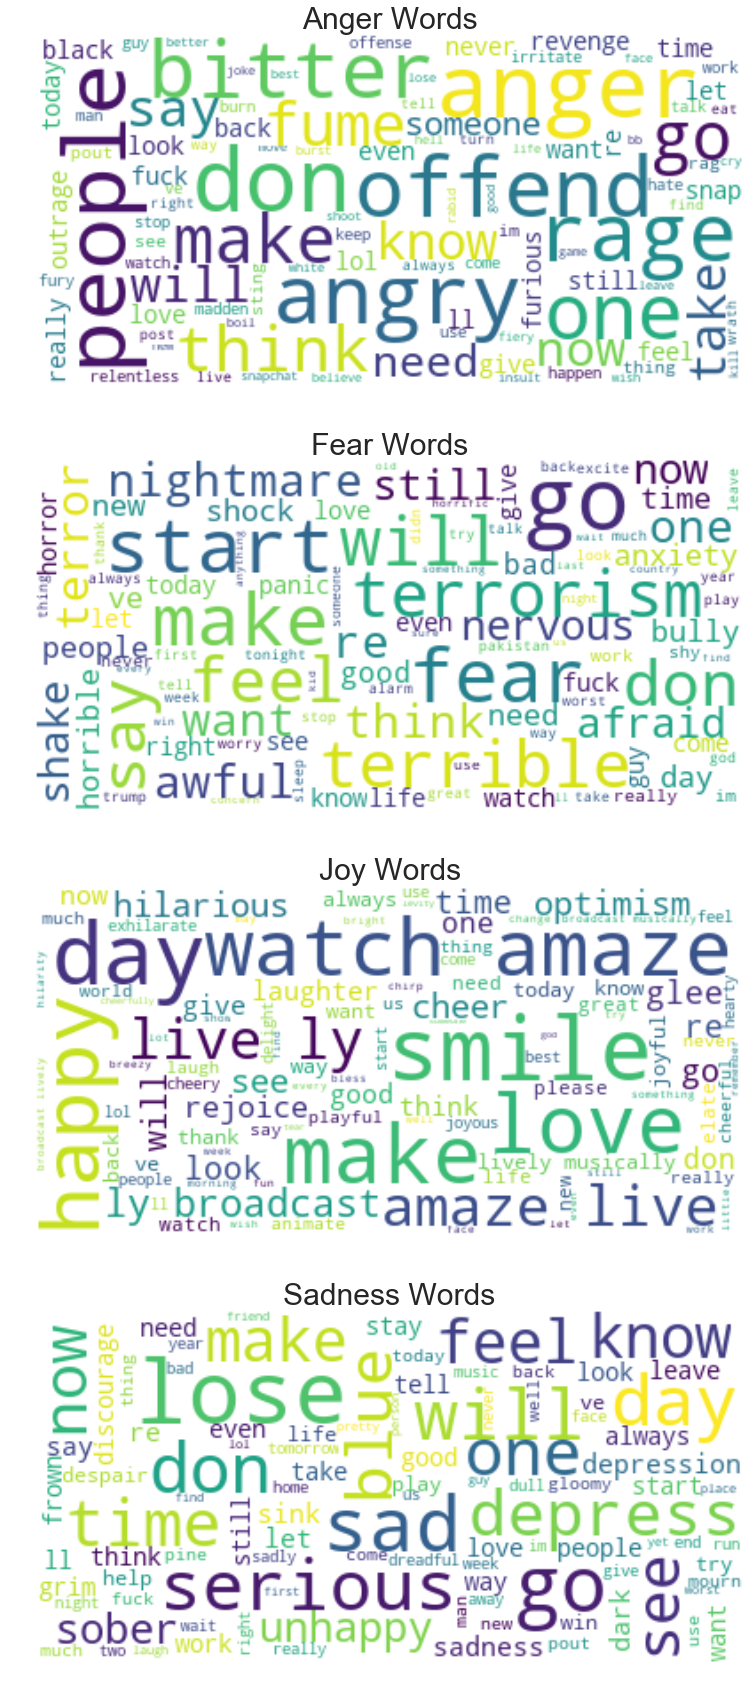

In [173]:
Tweet_a = " ".join(review for review in ang_df.stemmed)
Tweet_f = " ".join(review for review in fear_df.stemmed)
Tweet_j = " ".join(review for review in joy_df.stemmed)
Tweet_s = " ".join(review for review in sad_df.stemmed)
fig, ax = plt.subplots(4, 1, figsize  = (30,30))

# Create and generate a word cloud image:
wordcloud_a = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(Tweet_a)
wordcloud_f = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(Tweet_f)
wordcloud_j = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(Tweet_j)
wordcloud_s = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(Tweet_s)

# Display the generated image:
ax[0].imshow(wordcloud_a, interpolation='bilinear')
ax[0].set_title('Anger Words', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_f, interpolation='bilinear')
ax[1].set_title('Fear Words',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_j, interpolation='bilinear')
ax[2].set_title('Joy Words',fontsize=30)
ax[2].axis('off')
ax[3].imshow(wordcloud_s, interpolation='bilinear')
ax[3].set_title('Sadness Words',fontsize=30)
ax[3].axis('off')

In [174]:
cv = CountVectorizer(stop_words='english')

In [175]:
X = cv.fit_transform(df.stemmed)

In [176]:
count_vecs = pd.DataFrame(X.toarray(), index=df.stemmed, columns=cv.get_feature_names())

In [177]:
count_vecs.shape

(3613, 6933)

In [178]:
count_vecs.head()

,aa,aaa,aaron,aateam,ab,abby,aber,aberdeen,abhijit,ability,...,zeth,zika,zilch,zimmer,zionist,zombie,zombies,zone,zoolander,zumba
stemmed,,,,,,,,,,,,,,,,,,,,,
how the fu k who the heck move my fridge should i knock the landlord door angry mad,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
so my indian uber driver just call someone the n word if i wasn t in a move vehicle i d have jump out disgust,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
uk i ask for my parcel to be deliver to a pick up store not my address fume poorcustomerservice,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
so ef whichever butt wipe pull the fire alarm in davis bc i be sound asleep piss angry upset tire sad tire hangry,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
don t join they put the phone down on you talk over you and be rude take money out of my acc willynilly fume,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [179]:
lsa = TruncatedSVD(4)
doc_topic = lsa.fit_transform(count_vecs)
lsa.explained_variance_ratio_

array([0.00858643, 0.01225775, 0.00983301, 0.00855665])

In [180]:
topic_word = pd.DataFrame(lsa.components_.round(3),
             index = ["component_1","component_2","component_3","component_4"],
             columns = cv.get_feature_names())
topic_word

,aa,aaa,aaron,aateam,ab,abby,aber,aberdeen,abhijit,ability,...,zeth,zika,zilch,zimmer,zionist,zombie,zombies,zone,zoolander,zumba
component_1,0.0,0.0,0.0,0.0,0.003,0.0,0.0,0.000,0.0,0.003,...,0.0,0.0,0.0,0.000,0.0,0.001,0.000,0.001,0.001,0.0
component_2,-0.0,-0.0,-0.0,-0.0,-0.001,-0.0,-0.0,-0.000,-0.0,-0.001,...,-0.0,-0.0,-0.0,-0.000,-0.0,-0.000,0.001,-0.000,0.003,-0.0
component_3,0.0,0.0,0.0,0.0,0.005,-0.0,0.0,-0.000,-0.0,-0.001,...,0.0,-0.0,-0.0,-0.000,0.0,-0.000,0.000,-0.000,0.000,-0.0
component_4,0.0,0.0,0.0,0.0,-0.002,0.0,-0.0,0.001,0.0,0.002,...,0.0,0.0,0.0,0.001,-0.0,0.001,0.000,0.000,0.000,0.0


In [181]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [183]:
display_topics(lsa, cv.get_feature_names(), 20)


Topic  0
just, like, don, make, want, watch, know, love, think, say, time, people, feel, live, good, day, need, happy, let, really

Topic  1
watch, live, amaze, broadcast, ly, musically, lively, bridge, awsome, mila, mccloud, finfin, mae, blender, sartorious, swaggysquad, musicallyjh, tv, boss, fan

Topic  2
like, make, feel, look, today, bad, guy, say, work, old, sound, yo, big, great, better, rabid, polish, horrible, bully, broadcast

Topic  3
don, make, know, think, day, let, love, happy, smile, good, ll, people, fear, thank, time, things, change, use, world, need
